<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/best_practices/23_geopandas_pyogrio_pyarrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyogrio pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 16.6 MB/s eta 0:00:00


# Calculate Time

In [2]:
import geopandas as gpd
import pooch

In [3]:
anb_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/vector/geonb_anb_shp.zip',
    known_hash='67de38f5edb30f2578aef2a64f10a0a7cc7a8a1b77d680e34936574e35528f26'
)

In [4]:
anb_file = f'{anb_file}!geonb_anb_addresses.shp'
anb_file

'/root/.cache/pooch/2520ffadcdc6224a88a33a77bbf2de03-geonb_anb_shp.zip!geonb_anb_addresses.shp'

In [5]:
%%timeit -n 1 -r 3
df1 = gpd.read_file(anb_file, engine='fiona')

3min 40s ± 5.65 s per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [6]:
%%timeit -n 1 -r 3
df2 = gpd.read_file(anb_file, engine='pyogrio')

21.3 s ± 332 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [7]:
%%timeit -n 1 -r 3
df3 = gpd.read_file(anb_file, engine='pyogrio', use_arrow=True)

12.2 s ± 219 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


# Plotting

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
custom = {'grid.linestyle': 'dashed', 'grid.color': 'black'}
sns.set_style('whitegrid', rc=custom)

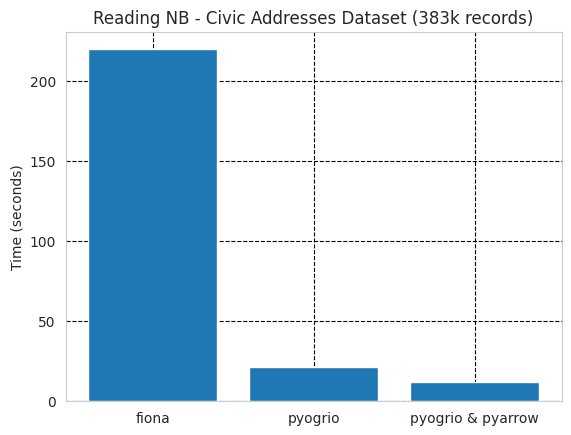

In [11]:
plt.bar(['fiona', 'pyogrio', 'pyogrio & pyarrow'], [220, 21.3, 12.2])
plt.ylabel('Time (seconds)')
plt.title('Reading NB - Civic Addresses Dataset (383k records)')
plt.savefig('timeit_result.png', bbox_inches='tight', dpi=600);